In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('base_datos_restaurantes_USA_v2.csv')
df_clientes = df.copy() # Crear una copia del DataFrame original para trabajar con los datos de clientes

In [3]:
# Exploracion inicial de los datos
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

In [4]:
df_clientes.duplicated(['id_persona']).sum() # Verificar si hay filas duplicadas

np.int64(0)

In [5]:
df_clientes.describe(include='all')

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,3.000000e+04,30000,30000,29899.000000,30000,30000,30000,30000.000000,29855.000000,30000,30000,28597,30000,14834,14928,30000,30000.000000
unique,NaN,690,1000,NaN,2,10,4,NaN,NaN,2,2,6,2,14834,14474,4,NaN
top,NaN,Michael,Smith,NaN,Femenino,Chicago,Medio,NaN,NaN,No,Sí,Carnes,No,295.679.7926x321,pjohnson@example.org,Efectivo,NaN
freq,NaN,678,636,NaN,15044,5384,9325,NaN,NaN,15094,18483,7916,17155,1,4,11813,NaN
mean,5.504765e+09,NaN,NaN,49.665006,NaN,NaN,NaN,3.896133,32.603452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5389.755867
std,2.602799e+09,NaN,NaN,23.839550,NaN,NaN,NaN,2.741532,26.402601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4538.491728
min,1.000153e+09,NaN,NaN,-5.000000,NaN,NaN,NaN,-3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000
25%,3.243617e+09,NaN,NaN,33.000000,NaN,NaN,NaN,2.000000,13.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1860.000000
50%,5.515865e+09,NaN,NaN,49.000000,NaN,NaN,NaN,4.000000,25.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3402.000000
75%,7.754426e+09,NaN,NaN,65.000000,NaN,NaN,NaN,5.000000,44.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7761.000000


In [6]:
df_clientes.isnull().sum() # Verificar si hay valores nulos

id_persona                       0
nombre                           0
apellido                         0
edad                           101
genero                           0
ciudad_residencia                0
estrato_socioeconomico           0
frecuencia_visita                0
promedio_gasto_comida          145
ocio                             0
consume_licor                    0
preferencias_alimenticias     1403
membresia_premium                0
telefono_contacto            15166
correo_electronico           15072
tipo_de_pago_mas_usado           0
ingresos_mensuales               0
dtype: int64

# Máscara para filtrar datos atípicos

In [7]:
# Mascara para filtrar edades atipicas, convertirnas a nan y luego rellenar con la media y cambiar el tipo de dato a entero

mask_edad_atipico = (df_clientes['edad'] < 18) | (df_clientes['edad'] > 100)    
df_clientes.loc[mask_edad_atipico, 'edad'] = np.nan
df_clientes['edad'] = df_clientes['edad'].fillna(df_clientes['edad'].mean()).astype(int)


# Mascara para filtrar gastos atipicos, convertirlas a nan y luego rellenar con la media

mask_gasto_atipico = (df_clientes['promedio_gasto_comida'] < 0) | (df_clientes['promedio_gasto_comida'] > 1000)    
df_clientes.loc[mask_gasto_atipico, 'promedio_gasto_comida'] = np.nan
df_clientes['promedio_gasto_comida'] = df_clientes['promedio_gasto_comida'].fillna(df_clientes['promedio_gasto_comida'].mean()).astype(int)

df_clientes['preferencias_alimenticias'] = df_clientes['preferencias_alimenticias'].fillna(df_clientes['preferencias_alimenticias'].mode()[0])


# Mascara para filtrar frecuencias de visita atipicas, convertirnas a nan y luego rellenar con la moda

mask_frecuencia_atipico = (df_clientes['frecuencia_visita'] < 0) | (df_clientes['frecuencia_visita'] > 30)    
df_clientes.loc[mask_frecuencia_atipico, 'frecuencia_visita'] = np.nan
df_clientes['frecuencia_visita'] = df_clientes['frecuencia_visita'].fillna(df_clientes['frecuencia_visita'].mode()[0]).astype(int)

df_clientes.isnull().sum() # Verificar si hay valores nulos

id_persona                       0
nombre                           0
apellido                         0
edad                             0
genero                           0
ciudad_residencia                0
estrato_socioeconomico           0
frecuencia_visita                0
promedio_gasto_comida            0
ocio                             0
consume_licor                    0
preferencias_alimenticias        0
membresia_premium                0
telefono_contacto            15166
correo_electronico           15072
tipo_de_pago_mas_usado           0
ingresos_mensuales               0
dtype: int64

# Unificación de las columnas 'nombre' y 'apellido'

In [8]:
#Concatenacion de las columnas 'nombre' y 'apellido'

df_clientes['nombre_completo'] = df_clientes['nombre'] + ' ' + df_clientes['apellido']
df_clientes = df_clientes.drop(['nombre', 'apellido'], axis=1)
df_clientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_persona                 30000 non-null  int64 
 1   edad                       30000 non-null  int64 
 2   genero                     30000 non-null  object
 3   ciudad_residencia          30000 non-null  object
 4   estrato_socioeconomico     30000 non-null  object
 5   frecuencia_visita          30000 non-null  int64 
 6   promedio_gasto_comida      30000 non-null  int64 
 7   ocio                       30000 non-null  object
 8   consume_licor              30000 non-null  object
 9   preferencias_alimenticias  30000 non-null  object
 10  membresia_premium          30000 non-null  object
 11  telefono_contacto          14834 non-null  object
 12  correo_electronico         14928 non-null  object
 13  tipo_de_pago_mas_usado     30000 non-null  object
 14  ingres

## Eliminación de filas con valores como 0 que no aportaban sentido al analisis.

In [9]:
## Identificamos que existen filas que tienen valor 0 en las columnas de 'frecuencia_visitas' y 'promedio_gasto_comida', 
# lo cual no tiene sentido (asumimos que fueron cargados como "ejemplos de prueba"), por lo que decidimos eliminar dichas filas.

# Eliminacion de filas que coinciden en 0 en las columnas de 'frecuencia_visitas' y 'promedio_gasto_comida'

df_clientes = df_clientes[~((df_clientes['frecuencia_visita'] == 0) & (df_clientes['promedio_gasto_comida'] == 0))]

print(f"Se eliminaron {df.shape[0] - df_clientes.shape[0]} filas que contenian 0 en las columnas de 'frecuencia_visita' y 'promedio_gasto_comida'.")

Se eliminaron 1463 filas que contenian 0 en las columnas de 'frecuencia_visita' y 'promedio_gasto_comida'.


In [10]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_persona                 28537 non-null  int64 
 1   edad                       28537 non-null  int64 
 2   genero                     28537 non-null  object
 3   ciudad_residencia          28537 non-null  object
 4   estrato_socioeconomico     28537 non-null  object
 5   frecuencia_visita          28537 non-null  int64 
 6   promedio_gasto_comida      28537 non-null  int64 
 7   ocio                       28537 non-null  object
 8   consume_licor              28537 non-null  object
 9   preferencias_alimenticias  28537 non-null  object
 10  membresia_premium          28537 non-null  object
 11  telefono_contacto          14083 non-null  object
 12  correo_electronico         14183 non-null  object
 13  tipo_de_pago_mas_usado     28537 non-null  object
 14  ingresos_me

In [11]:
df_clientes.to_csv('clientes.csv', index=True)
print(f"Se han guardado {len(df_clientes)} resultados en 'clientes.csv'")

Se han guardado 28537 resultados en 'clientes.csv'


----


# Tablas de resumen para ver distribuciones básicas

In [12]:
tabla_ciudades = df_clientes['ciudad_residencia'].value_counts().reset_index()
tabla_ciudades.columns = ['ciudad_residencia','conteo']

print(tabla_ciudades)

  ciudad_residencia  conteo
0           Chicago    5123
1               NYC    4503
2             Miami    3084
3         San Diego    2961
4            Dallas    2453
5            Denver    2419
6            Boston    2409
7           Seattle    2092
8           Houston    2072
9           Phoenix    1421


In [13]:
tabla_genero_ciudad = df_clientes.groupby(['ciudad_residencia','genero']).size().reset_index(name='conteo')
print(tabla_genero_ciudad)

   ciudad_residencia     genero  conteo
0             Boston   Femenino    1236
1             Boston  Masculino    1173
2            Chicago   Femenino    2533
3            Chicago  Masculino    2590
4             Dallas   Femenino    1181
5             Dallas  Masculino    1272
6             Denver   Femenino    1228
7             Denver  Masculino    1191
8            Houston   Femenino    1012
9            Houston  Masculino    1060
10             Miami   Femenino    1517
11             Miami  Masculino    1567
12               NYC   Femenino    2307
13               NYC  Masculino    2196
14           Phoenix   Femenino     698
15           Phoenix  Masculino     723
16         San Diego   Femenino    1511
17         San Diego  Masculino    1450
18           Seattle   Femenino    1060
19           Seattle  Masculino    1032


In [14]:
tabla_pref_ciudad = df_clientes.groupby(['ciudad_residencia','preferencias_alimenticias']).size().reset_index(name='conteo')
print(tabla_pref_ciudad)

   ciudad_residencia preferencias_alimenticias  conteo
0             Boston                    Carnes     599
1             Boston                  Mariscos     465
2             Boston                      Otro     194
3             Boston                   Pescado     254
4             Boston                    Vegano     229
5             Boston               Vegetariano     668
6            Chicago                    Carnes    1767
7            Chicago                  Mariscos     669
8            Chicago                      Otro     557
9            Chicago                   Pescado     522
10           Chicago                    Vegano     542
11           Chicago               Vegetariano    1066
12            Dallas                    Carnes     894
13            Dallas                  Mariscos     345
14            Dallas                      Otro     234
15            Dallas                   Pescado     228
16            Dallas                    Vegano     242
17        

In [15]:
df_clientes.head(10)

,id_persona,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales,nombre_completo
0,2550327378,31,Masculino,Miami,Alto,6,67,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425,Jackson Gomez
1,9446112038,40,Femenino,Denver,Medio,2,44,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374,Samantha Soto
2,3098363243,62,Femenino,Denver,Bajo,2,9,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110,Terry Adams
3,4013002847,41,Masculino,Boston,Alto,5,30,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931,James Shannon
5,1291749568,26,Femenino,Dallas,Alto,6,52,No,Sí,Carnes,Sí,976.606.6259x578,daniel28@example.com,Efectivo,8545,Donna Davis
6,3592027247,80,Masculino,NYC,Muy Alto,10,56,No,No,Vegano,Sí,001-327-542-1940x4789,bcastillo@example.org,Efectivo,10120,Jason Mcpherson
7,8373803828,66,Femenino,Boston,Muy Alto,9,19,No,Sí,Vegetariano,Sí,NaN,NaN,Efectivo,13456,Julie Russo
8,7395628831,31,Masculino,NYC,Medio,5,16,No,Sí,Vegetariano,No,NaN,kara70@example.com,App,3350,Mark Hall
9,5394273061,37,Femenino,Boston,Bajo,1,11,Sí,No,Carnes,No,563-346-4749x6591,smithstacy@example.com,Efectivo,1197,Sara Ball
10,3040296770,80,Femenino,NYC,Bajo,1,12,Sí,Sí,Carnes,No,+1-881-859-5881x2368,romeroangela@example.org,Efectivo,1574,Brittany Mcmillan


In [16]:
df_nyc = df_clientes[df_clientes['ciudad_residencia'] == 'NYC']
df_nyc.head(10)

,id_persona,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales,nombre_completo
6,3592027247,80,Masculino,NYC,Muy Alto,10,56,No,No,Vegano,Sí,001-327-542-1940x4789,bcastillo@example.org,Efectivo,10120,Jason Mcpherson
8,7395628831,31,Masculino,NYC,Medio,5,16,No,Sí,Vegetariano,No,NaN,kara70@example.com,App,3350,Mark Hall
10,3040296770,80,Femenino,NYC,Bajo,1,12,Sí,Sí,Carnes,No,+1-881-859-5881x2368,romeroangela@example.org,Efectivo,1574,Brittany Mcmillan
11,2603488527,24,Femenino,NYC,Medio,5,47,No,Sí,Vegetariano,No,NaN,fsmith@example.com,Tarjeta,2609,Kimberly Garcia
12,5270305828,70,Masculino,NYC,Alto,5,42,Sí,Sí,Vegetariano,Sí,332-647-0730,ramirezstacy@example.com,App,3538,Jeffrey Hill
18,6836509775,46,Masculino,NYC,Alto,5,64,Sí,No,Carnes,Sí,NaN,iburnett@example.net,App,6210,Bryan Coleman
25,3973656415,35,Femenino,NYC,Alto,4,19,No,Sí,Vegetariano,No,001-705-597-3037,xrowe@example.net,Efectivo,6754,Tiffany Tate
31,4259607533,24,Masculino,NYC,Bajo,2,10,Sí,Sí,Carnes,No,NaN,NaN,App,1289,Adam Russell
35,1676220116,72,Femenino,NYC,Bajo,3,16,No,No,Carnes,No,364.929.6172x47273,NaN,Tarjeta,1207,Brenda Clark
50,7227967023,36,Femenino,NYC,Bajo,1,16,Sí,Sí,Vegetariano,No,(512)805-8498x44753,johnsonkenneth@example.org,Tarjeta,901,Sarah Lopez


# Guardando el dataset depurado en formato .csv

In [17]:
df_nyc.to_csv('clientes_nyc.csv', index=True)

----

# Gráficos de resumen de los insight encontrados en el dataset depurado.

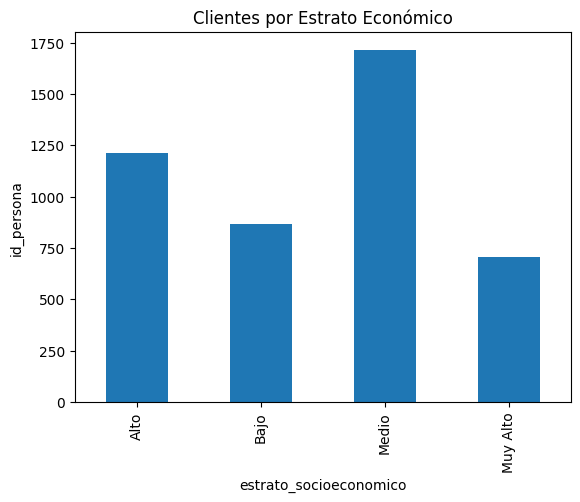

In [18]:
df_nyc['estrato_socioeconomico'].value_counts().sort_index().plot(kind='bar')
plt.title('Clientes por Estrato Económico')
plt.xlabel('estrato_socioeconomico')
plt.ylabel('id_persona')
plt.show()

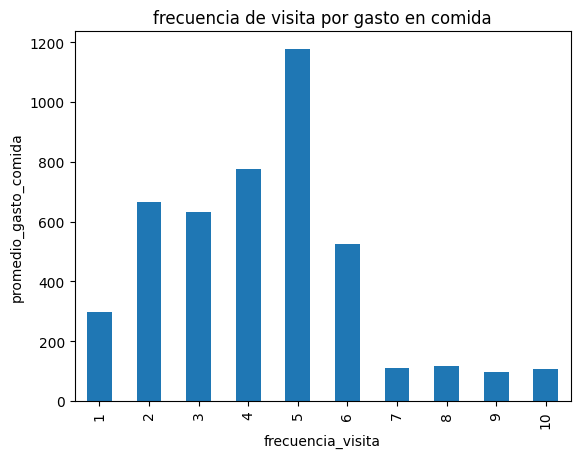

In [19]:
df_nyc['frecuencia_visita'].value_counts().sort_index().plot(kind='bar')
plt.title('frecuencia de visita por gasto en comida')
plt.xlabel('frecuencia_visita')
plt.ylabel('promedio_gasto_comida')
plt.show()

Este grafico demuestra como baja el consumo dentro del restaurante despues de las primeras 6 visitas

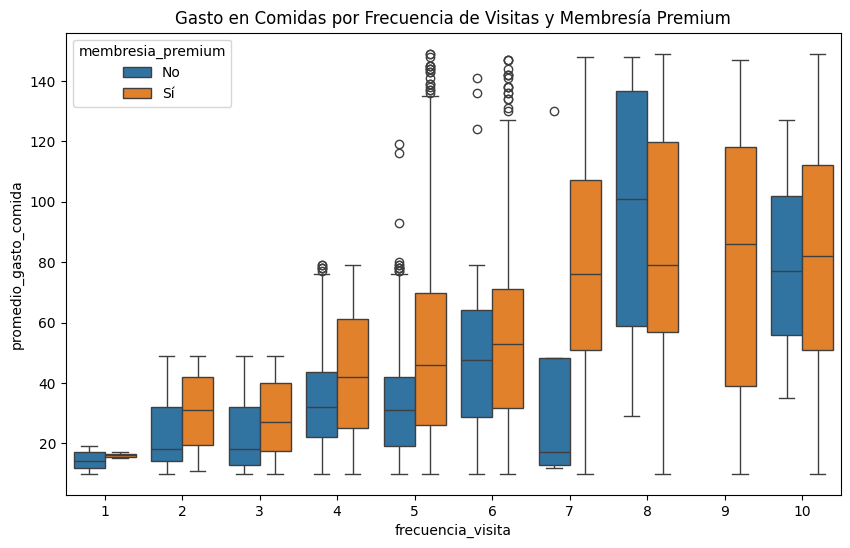

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='frecuencia_visita', y='promedio_gasto_comida', hue='membresia_premium', data=df_nyc)
plt.title('Gasto en Comidas por Frecuencia de Visitas y Membresía Premium')
plt.show()

El grafico muestra como a pesar de que el promedio de gasto en comida baja en relacion a los clientes con membresia premium aún así los clientes siguen consumiendo más que otros en los restaurantes.


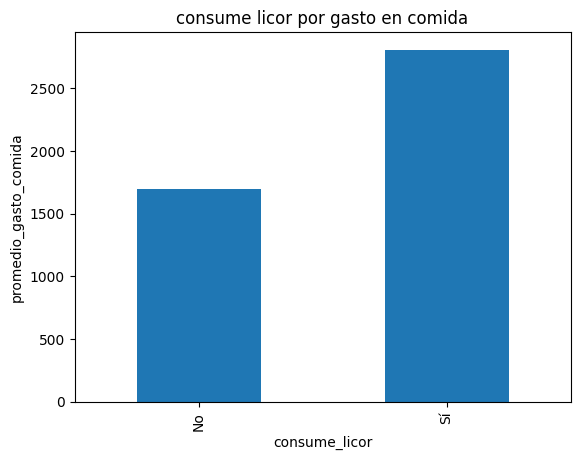

In [21]:
df_nyc['consume_licor'].value_counts().sort_index().plot(kind='bar')
plt.title('consume licor por gasto en comida')
plt.xlabel('consume_licor')
plt.ylabel('promedio_gasto_comida')
plt.show()

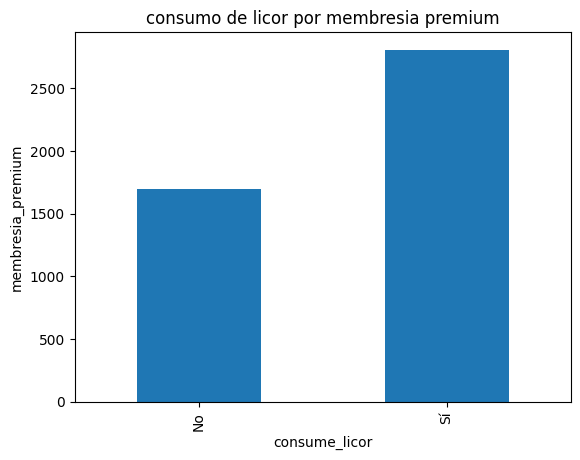

In [22]:
df_nyc['consume_licor'].value_counts().sort_index().plot(kind='bar')
plt.title('consumo de licor por membresia premium')
plt.xlabel('consume_licor')
plt.ylabel('membresia_premium')
plt.show()

<Figure size 800x600 with 0 Axes>

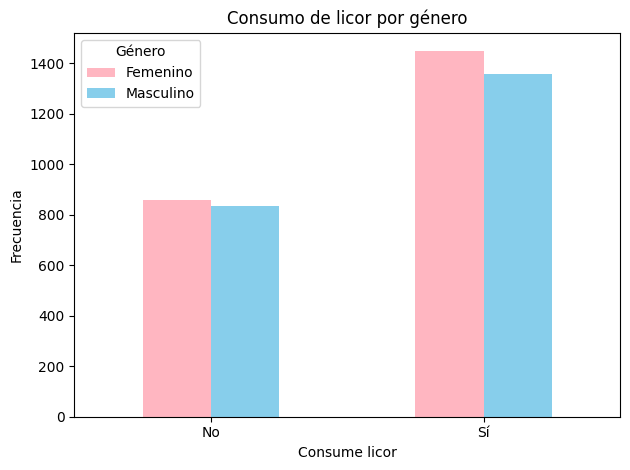

In [23]:
plt.figure(figsize=(8, 6))
pd.crosstab(df_nyc['consume_licor'], df_nyc['genero']).plot(kind='bar', color=['lightpink', 'skyblue'])
plt.title('Consumo de licor por género')
plt.xlabel('Consume licor')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



----